<a href="https://colab.research.google.com/github/micattia/Capstone/blob/master/04_Bivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#loading required libraries 
#==========================
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import plotly.plotly as py
import plotly.figure_factory as ff
%matplotlib inline

pyplot.style.use('ggplot')

In [0]:
#load pandas component for data science
import pandas as pd

#load Apple data 
linkAP1 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/AppleFinalData.csv'
dfAPPL = pd.read_csv(linkAP1)
linkAP2 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/AppleNewsStock.csv'
dfAPPLnews = pd.read_csv(linkAP2)

#load Microsoft data
linkMS1 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/MicrosoftFinalData.csv'
dfMS = pd.read_csv(linkMS1)
linkMS2 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/MicrosoftNewsStock.csv'
dfMSnews = pd.read_csv(linkMS2)

# Changing Some column names for the Microsoft main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfMS = dfMS.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})

# Changing Some column names for the Apple main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfAPPL = dfAPPL.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})



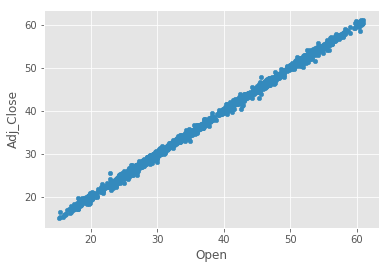

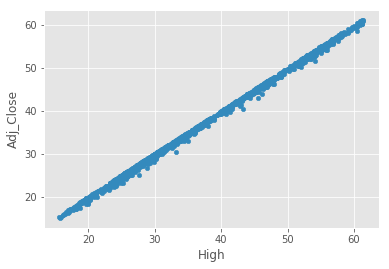

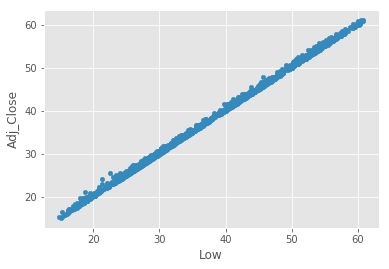

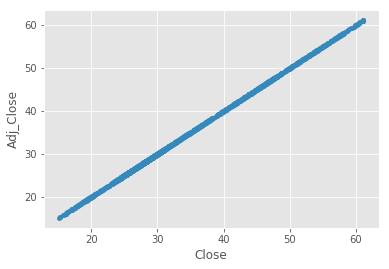

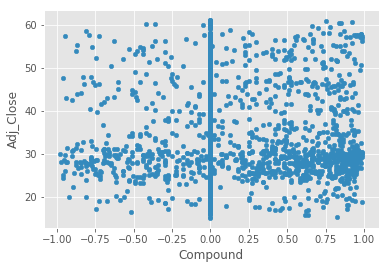

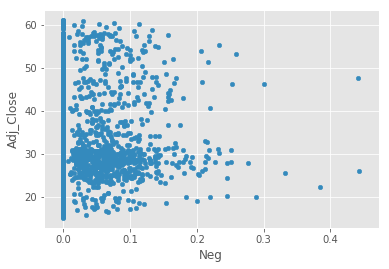

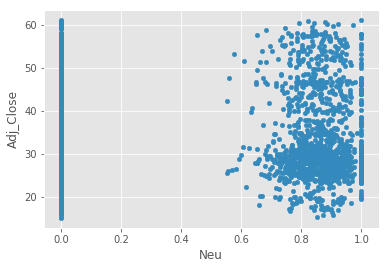

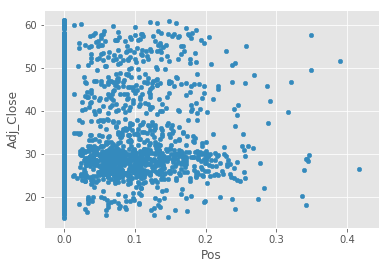

In [0]:
#Scatter Plot between each variable in the Microsoft data set and the dependant variable
dfMS.plot.scatter(x='Open',y='Adj_Close')
dfMS.plot.scatter(x='High',y='Adj_Close')
dfMS.plot.scatter(x='Low',y='Adj_Close')
dfMS.plot.scatter(x='Close',y='Adj_Close')
dfMS.plot.scatter(x='Compound',y='Adj_Close')
dfMS.plot.scatter(x='Neg',y='Adj_Close')
dfMS.plot.scatter(x='Neu',y='Adj_Close')
dfMS.plot.scatter(x='Pos',y='Adj_Close')

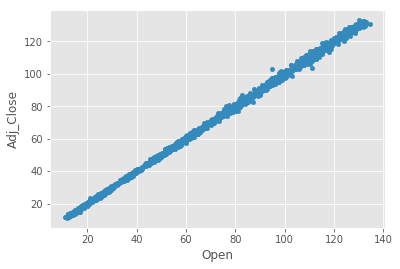

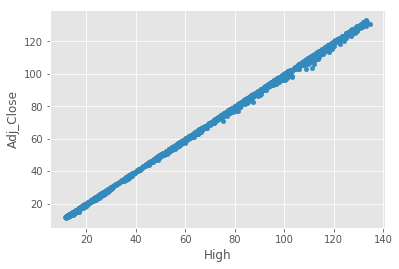

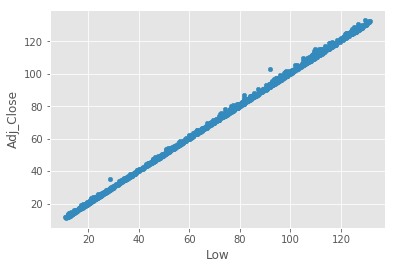

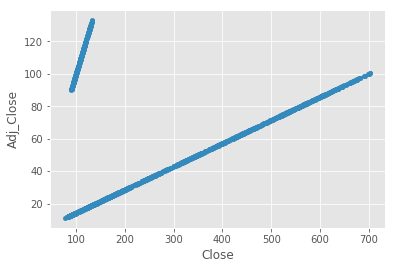

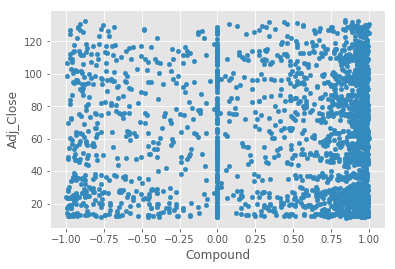

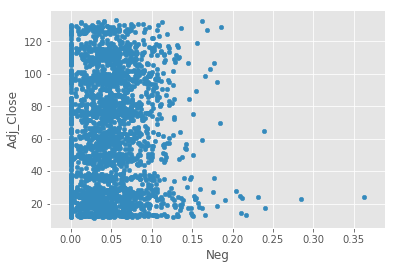

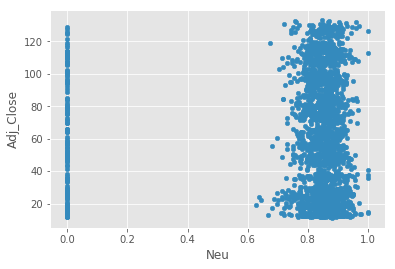

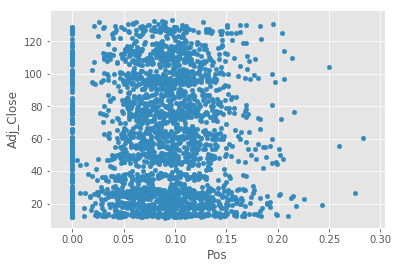

In [0]:
#Scatter Plot between each variable in the Apple data set and the dependant variable
dfAPPL.plot.scatter(x='Open',y='Adj_Close')
dfAPPL.plot.scatter(x='High',y='Adj_Close')
dfAPPL.plot.scatter(x='Low',y='Adj_Close')
dfAPPL.plot.scatter(x='Close',y='Adj_Close')
dfAPPL.plot.scatter(x='Compound',y='Adj_Close')
dfAPPL.plot.scatter(x='Neg',y='Adj_Close')
dfAPPL.plot.scatter(x='Neu',y='Adj_Close')
dfAPPL.plot.scatter(x='Pos',y='Adj_Close')

In [0]:
# Measure the Correlation between Columns in the Microsoft data set
dfMS.corr()

,Open,High,Low,Close,Adj_Close,Compound,Neg,Neu,Pos
Open,1.000000,0.999567,0.999535,0.999098,0.999098,0.016863,-0.014212,-0.002361,0.015167
High,0.999567,1.000000,0.999411,0.999561,0.999561,0.016935,-0.013980,-0.001810,0.015332
Low,0.999535,0.999411,1.000000,0.999576,0.999576,0.016682,-0.014770,-0.002587,0.013983
Close,0.999098,0.999561,0.999576,1.000000,1.000000,0.016518,-0.014516,-0.002288,0.014104
Adj_Close,0.999098,0.999561,0.999576,1.000000,1.000000,0.016518,-0.014516,-0.002288,0.014104
Compound,0.016863,0.016935,0.016682,0.016518,0.016518,1.000000,-0.315375,0.298019,0.680730
Neg,-0.014212,-0.013980,-0.014770,-0.014516,-0.014516,-0.315375,1.000000,0.444034,0.282799
Neu,-0.002361,-0.001810,-0.002587,-0.002288,-0.002288,0.298019,0.444034,1.000000,0.582143
Pos,0.015167,0.015332,0.013983,0.014104,0.014104,0.680730,0.282799,0.582143,1.000000


In [0]:
# Measure the Correlation between Columns in the Apple data set
dfAPPL.corr()

,Open,High,Low,Close,Adj_Close,Compound,Neg,Neu,Pos
Open,1.000000,0.999853,0.999817,0.140704,0.999659,0.009487,0.023986,0.018341,0.026119
High,0.999853,1.000000,0.999774,0.140181,0.999843,0.009851,0.024153,0.018570,0.026480
Low,0.999817,0.999774,1.000000,0.140897,0.999843,0.009263,0.023531,0.017542,0.025640
Close,0.140704,0.140181,0.140897,1.000000,0.140605,0.049722,0.013309,0.031983,0.036717
Adj_Close,0.999659,0.999843,0.999843,0.140605,1.000000,0.009836,0.023859,0.018164,0.026172
Compound,0.009487,0.009851,0.009263,0.049722,0.009836,1.000000,-0.497096,0.223225,0.565060
Neg,0.023986,0.024153,0.023531,0.013309,0.023859,-0.497096,1.000000,0.263576,0.155837
Neu,0.018341,0.018570,0.017542,0.031983,0.018164,0.223225,0.263576,1.000000,0.438137
Pos,0.026119,0.026480,0.025640,0.036717,0.026172,0.565060,0.155837,0.438137,1.000000


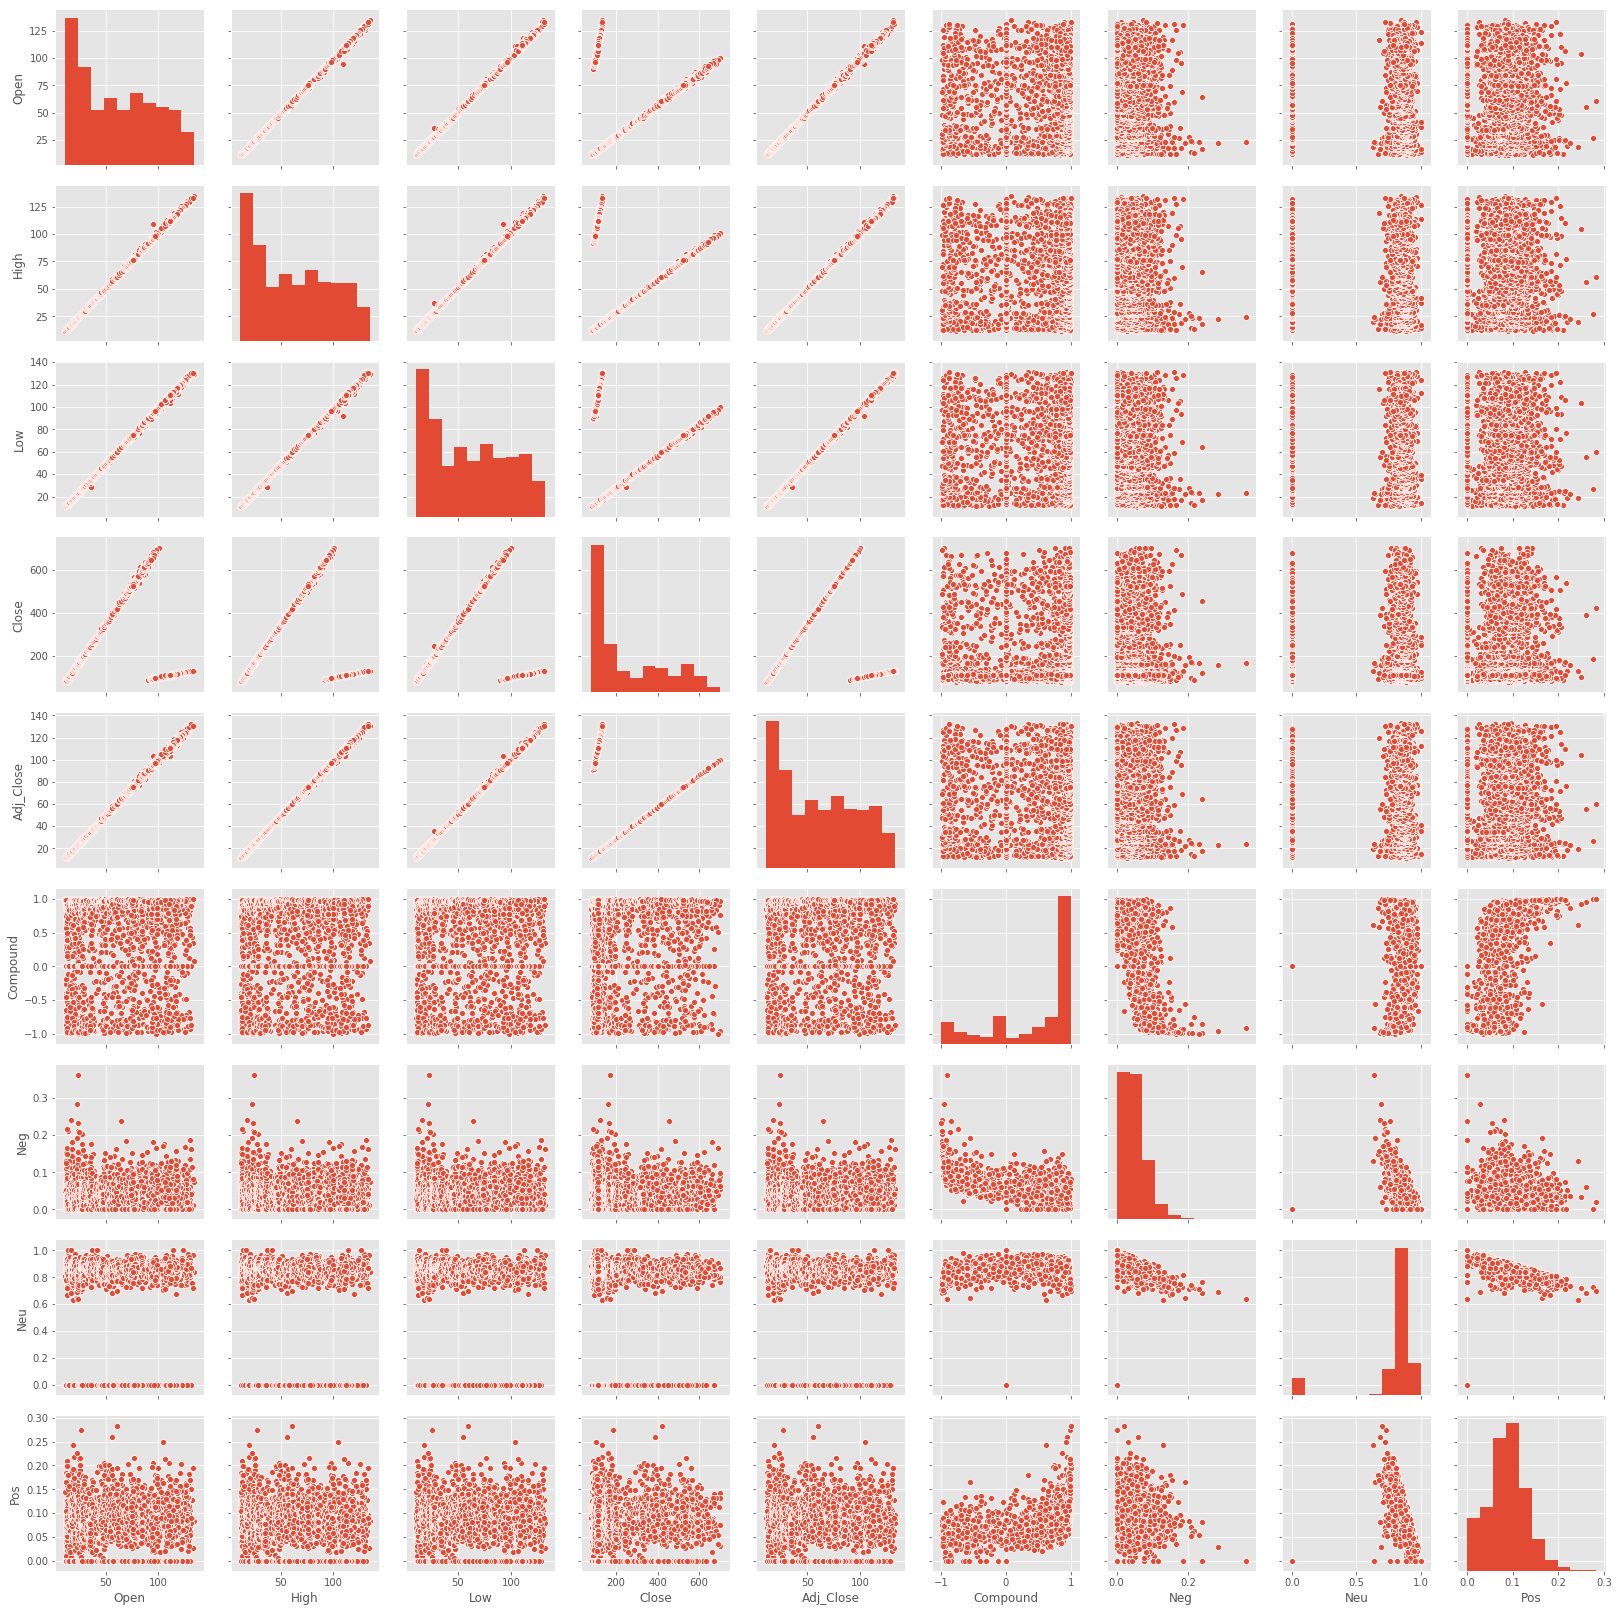

In [0]:
# Also checking the pair plot for the Microsoft Data Set
#import seaborn as sns
# Create the default pairplot
sns.pairplot(dfAPPL)

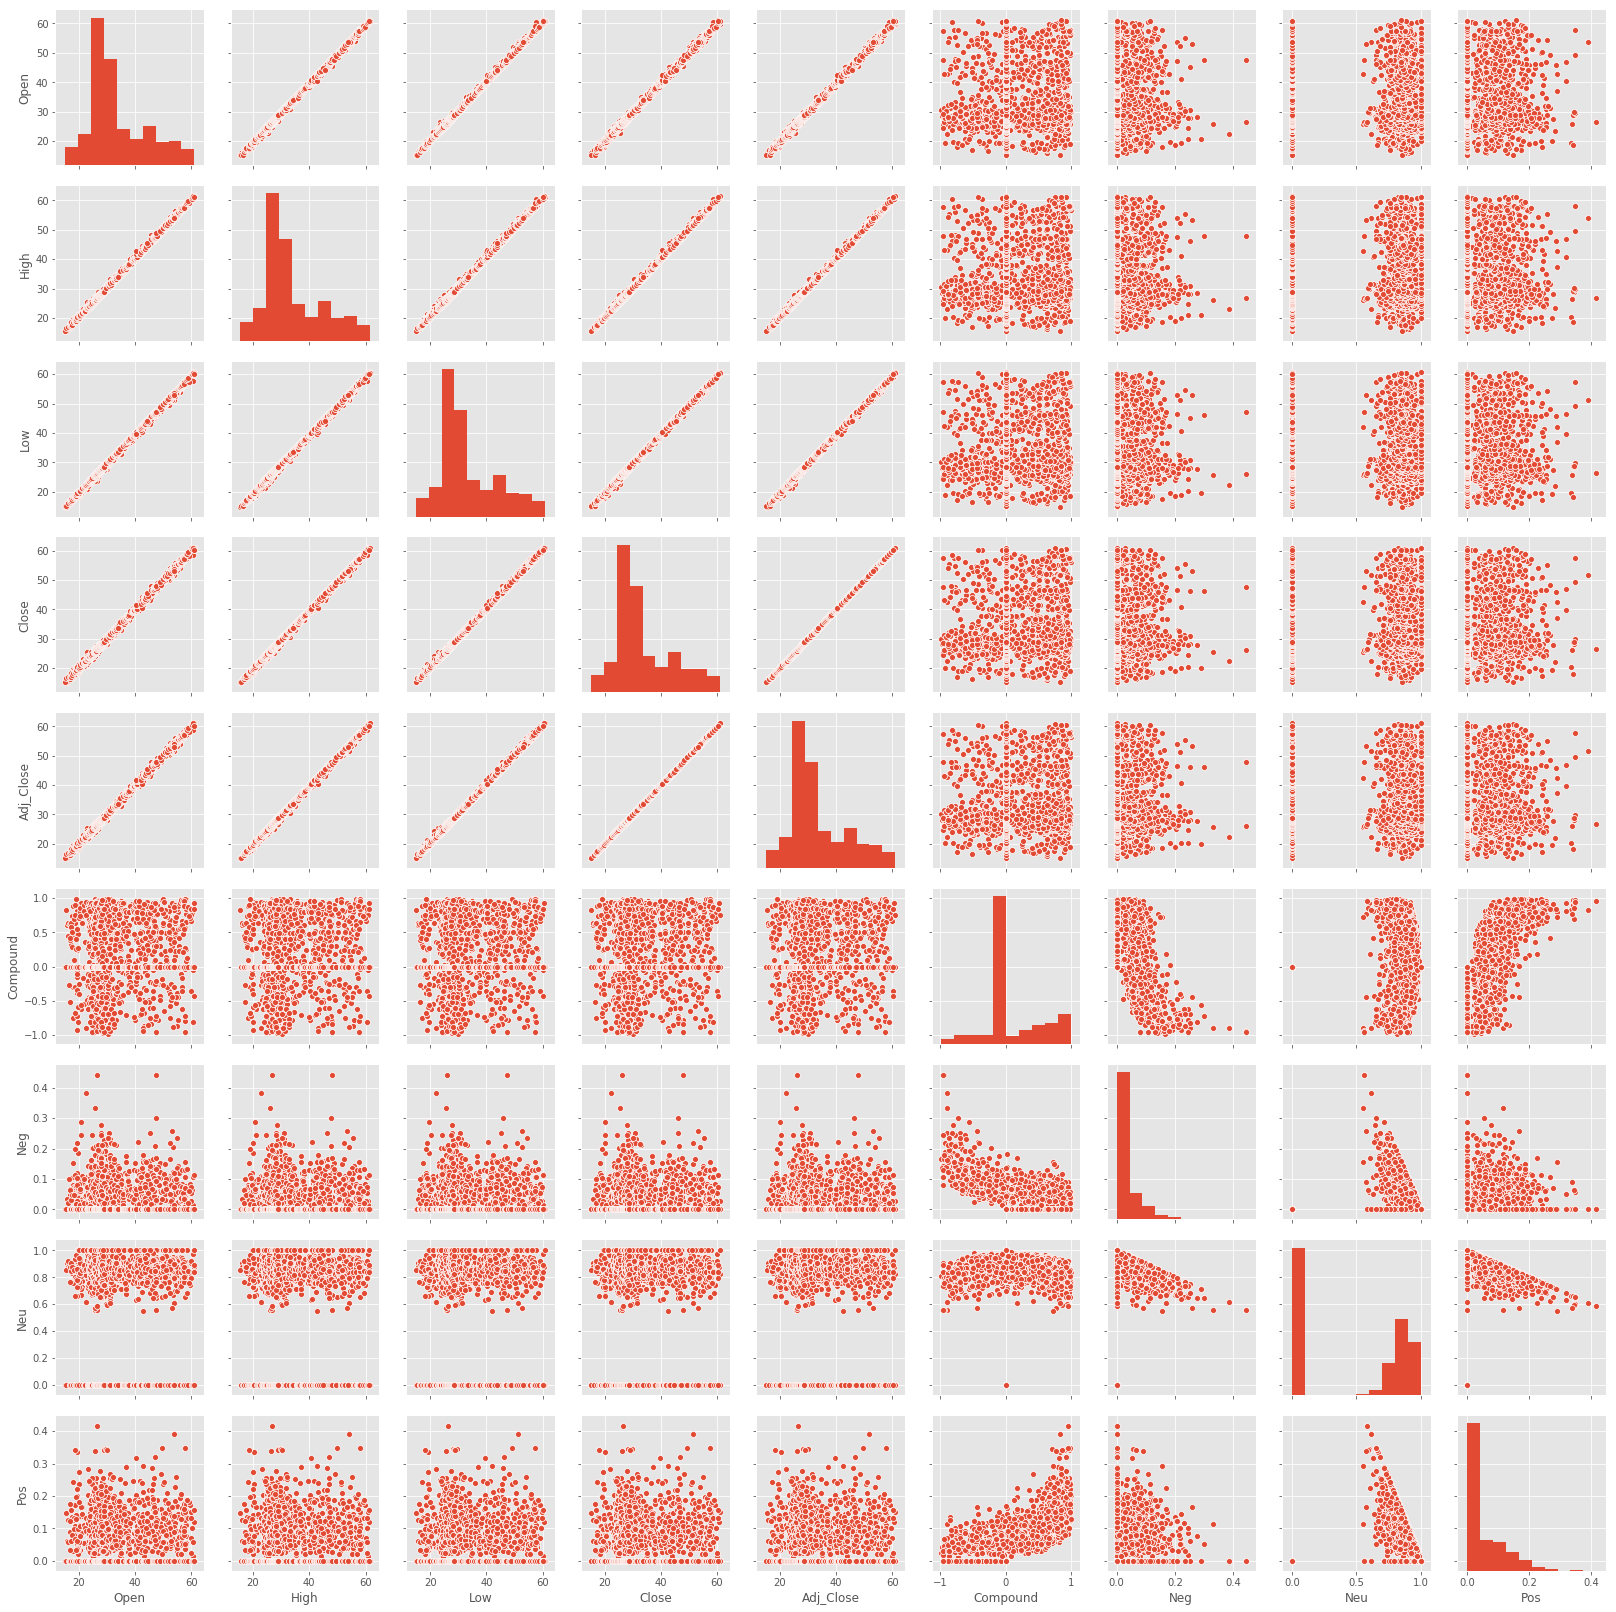

In [0]:
# Also checking the pair plot for the Microsoft Data Set
import seaborn as sns
# Create the default pairplot
sns.pairplot(dfMS)

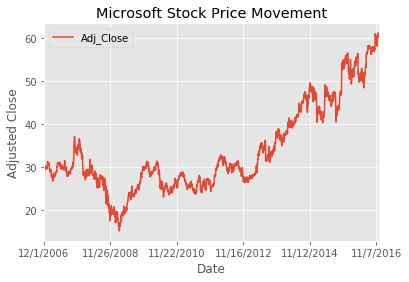

In [0]:
# CREATING A SUBSET OF MICROSOFT DATASET WITH ONLY TWO COLUMNS THE DATE AND ADJ_CLOSE
# THE REASON FOR CREATING THIS DATA SET IS TO PLOT THE STOCK PRICE MOVEMENT OVER TIME 
# TO SEE HOW THE PRICE CHANGE IS GOING THROUGH THE TEN YEARS RANGE OF THE DATASET
# The Graph shows the effect of the financial Crisys in 2008 on the Microsoft Stock 

# creating the dataframe with date column as the index
dfMSind = pd.read_csv(linkMS1, index_col="Date",usecols=["Date","Adj Close"])
# renaming the adj close column name to remove the space
dfMSind = dfMSind.rename(index=str,columns={"Adj Close": "Adj_Close"})
#dfMSind.head()
# creating the plot object with title and form parameters, then giving the X and Y labels
ax = dfMSind.plot(title = "Microsoft Stock Price Movement",fontsize = 10)
ax.set_xlabel("Date")
ax.set_ylabel("Adjusted Close")
pyplot.show()

# code sample for Slicing the Dataset
#ls = dfMS[[str('Date'),'Close','Open']]
#ls = dfMSind[['Date','Adj_Close']]

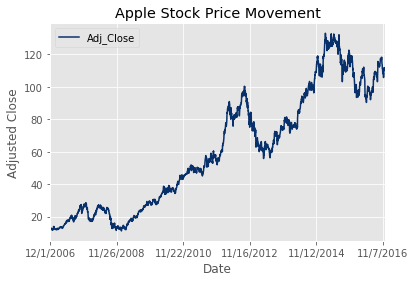

In [0]:
# CREATING A SUBSET OF APPLE DATASET WITH ONLY TWO COLUMNS THE DATE AND ADJ_CLOSE
# THE REASON FOR CREATING THIS DATA SET IS TO PLOT THE STOCK PRICE MOVEMENT OVER TIME 
# TO SEE HOW THE PRICE CHANGE IS GOING THROUGH THE TEN YEARS RANGE OF THE DATASET

# creating the dataframe with date column as the index
dfAPPLind = pd.read_csv(linkAP1, index_col="Date",usecols=["Date","Adj Close"])
# renaming the adj close column name to remove the space
dfAPPLind = dfAPPLind.rename(index=str,columns={"Adj Close": "Adj_Close"})
#dfMSind.head()
# creating the plot object with title and form parameters, then giving the X and Y labels
ax = dfAPPLind.plot(title = "Apple Stock Price Movement",fontsize = 10, colormap = "Blues_r")
ax.set_xlabel("Date")
ax.set_ylabel("Adjusted Close")
pyplot.show()

In [12]:
# THE STOCK PRICE MOVEMENT WAS VERY IMPORTANT AS IT SHOWS 
# HOW FAR THE STOCK PROCE REACHED AWAY FROM THE MEAN STARTING ON WHAT DATE
# AND THAT WOULD HEALP TO REDUCE THE DATA BY SUBSETING THE DATA STARTING A SPECIFIC DATE 
# THIS IS A PART OF REMOVING THE OUTLIERS TRYING TO GET MOR NORMALIZED DATASET
# THE PRICE MOVEMENT GRAPH SHOWS THAT STOCK STARTED TO RISE AFTER NOV 12 2014

# first getting the index of NOV 11 2014
ar1 = np.where(dfMS["Date"] == '11/12/2013')
ar2 = np.where(dfMS["Date"] == '11/26/2008')
print(ar1)
print(ar2)

(array([1748]),)
(array([500]),)


In [16]:
# second: slicing the dataset till NOV 2014
ls = dfMS[500:1748]
ls.head()

,Date,Open,High,Low,Close,Adj_Close,Compound,Neg,Neu,Pos
500,11/26/2008,19.73,20.68,19.73,20.49,20.49,0.0000,0.0,0.000,0.000
501,11/28/2008,20.23,20.31,20.02,20.22,20.22,0.0000,0.0,0.000,0.000
502,12/1/2008,19.88,19.95,18.60,18.61,18.61,0.0000,0.0,0.000,0.000
503,12/2/2008,18.99,19.31,18.56,19.15,19.15,0.0000,0.0,0.000,0.000
504,12/3/2008,18.65,19.90,18.60,19.87,19.87,0.6369,0.0,0.828,0.172


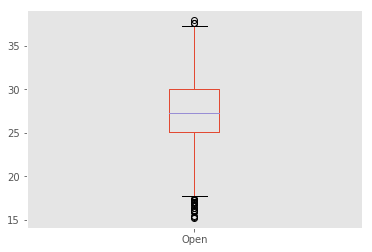

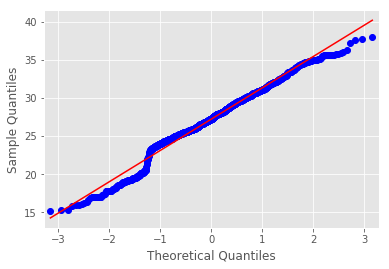

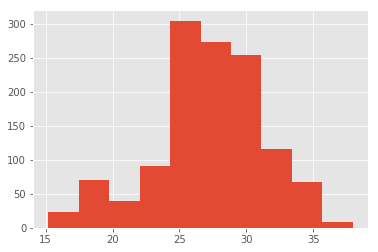

In [14]:


#Re-Test Normality again for Microsoft data set columns [Open]

# Box Plot
ls.boxplot( column =['Open'], grid = False) 
# q-q plot
qqplot(ls.Open, line='s')
pyplot.show()
# histogram plot
pyplot.hist(ls.Open)
pyplot.show()

